# 1. Your views about the problem statement?

**Ans:**
This problem is important because it's about predicting rain accurately, something we all care about. We're using machine learning models to figure out when it's going to rain in Sydney, Australia. We're trying different ways of doing this, like using Decision Trees and Ensemble methods. This matters in our daily lives because knowing the weather helps us plan what to do and when.

# 2. What will be your approach to solving this task?

**Ans:**
In my view and based on what I've learned so far, I'd like to follow a step-by-step approach:

**Data Importing and Exploration:**

Load the provided Sydney rainfall data into a pandas DataFrame.
Explore the dataset to understand its structure, features, and data types.
Look at descriptive statistics to get insights into the data.

**Data Preprocessing:**

Use one-hot encoding to create dummy variables for the "RainToday & RainTomorrow" field.
Check for missing values and outliers.
Perform correlation analysis to understand relationships with the dependent variable.
Identify any unnecessary columns for deletion.

**Model Selection:**

Implement various classification and ensemble models like Logistic Regression, LDA, KNN, Random Forest Classifier, Gradient Boosting Classifier, ADA Boost Classifier, and XG Boost Classifier.
Evaluate each model's performance using metrics like Confusion Matrix, Accuracy Score, Precision Score, Recall Score, and ROC AUC Score on the test data.

**Model Evaluation:**

Compare the metrics of each model to assess their performance.
Choose the model that performs best based on the unique needs and criteria of the problem.

**Model Finalization:**

Select the model with the highest performance, considering factors like accuracy, interpretability, and computational complexity.






# 3. What were the available ML model options you had to perform this task?

**Ans:** For the task of predicting rainfall in Sydney, there are several machine learning model options available. Here are some of the key model options that can be considered:

**Decision Trees:** Decision tree classifiers are a fundamental classification model. They work by recursively splitting the data into subsets based on the most significant input features, creating a tree-like structure.

**Random Forest:** Random Forest is an ensemble method that combines multiple decision trees to improve prediction accuracy. It uses bagging (bootstrap aggregating) to create multiple decision trees and averages their predictions.

**Gradient Boosting:** Gradient Boosting is another ensemble method that combines multiple weak learners (typically decision trees) to create a strong learner.

**AdaBoost:** AdaBoost is an ensemble method that combines multiple weak classifiers to create a strong classifier. It adjusts the weights of data points to focus on examples that are difficult to classify.

**XGBoost:** XGBoost is a popular gradient boosting algorithm known for its high performance. It is suitable for classification tasks and can provide accurate predictions.

**Logistic Regression:** While logistic regression is primarily used for binary classification, it can also be applied to multi-class classification tasks. It's a simple and interpretable model.

**K-Nearest Neighbors (KNN):** KNN is a non-parametric model that classifies data points based on the majority class of their nearest neighbors.

# 4. Which model’s performance is best and what could be the possible reason for that?

**Ans:** In the analysis, it was determined that the Random Forest model performs the best for predicting rainfall in Sydney. This conclusion is based on evaluating various classification models, including Logistic Regression, LDA, KNN, Random Forest Classifier, Gradient Boosting Classifier, ADA Boost Classifier, and XG Boost Classifier.

The Random Forest model stands out for several reasons:

**High Accuracy Score (84.73%):**

The Random Forest achieved the highest accuracy score among all models. This means that it accurately predicted whether it will rain or not in Sydney about 84.73% of the time.

**Precision Score (77.78%):**

Precision is crucial, especially when considering the positive class (rainfall prediction). The Random Forest achieved a precision score of 77.78%, indicating that when it predicted rainfall, it was correct about 77.78% of the time.

**ROC AUC Score (0.7354):**

The ROC AUC score measures the ability of the model to distinguish between positive and negative cases. With a score of 0.7354, the Random Forest demonstrated good performance in this aspect.

These high scores collectively contribute to the Random Forest being identified as the top-performing model for the rainfall prediction task in Sydney. Its ability to balance accuracy, precision, and the ability to differentiate between positive and negative cases makes it the preferred choice for this specific dataset and problem statement.

# 5. What steps can you take to improve this selected model's performance even further?

**Ans:**
If the Random Forest model without grid search has been identified as the best performer, there are still several steps you can take to further enhance its performance:

**Feature Engineering:**

Explore additional feature engineering techniques to create new relevant features that might improve the model's understanding of the data.
Experiment with transforming or combining existing features to uncover potential patterns that could contribute to better predictions.

**Increase Tree Depth:**

Adjust the hyperparameters of the Random Forest, particularly the maximum depth of the trees. Increasing the maximum depth might allow the model to capture more complex relationships in the data.

**Feature Importance Analysis:**

Analyze the feature importance provided by the Random Forest model. Focus on the most influential features and consider refining the dataset by removing less important or redundant features.

**Ensemble Methods:**

Experiment with ensemble methods by combining predictions from multiple instances of the Random Forest model with different random initializations. This ensemble approach may provide additional robustness.

**Data Balancing:**

If the dataset is imbalanced, consider strategies to address this issue. Techniques such as oversampling the minority class or undersampling the majority class can help balance the dataset, potentially improving the model's ability to predict positive cases.

**Cross-Validation:**

Implement robust cross-validation techniques to ensure that the model's performance is consistent across different subsets of the data. This helps in identifying if the model is overfitting or underfitting.

**Continual Monitoring and Updating:**

Continually monitor the model's performance over time and update it as new data becomes available. Retraining the model periodically with fresh data can help it adapt to changing patterns and trends.

If interpretability is essential, consider exploring techniques to make the Random Forest model more interpretable, such as limiting the depth of the trees or using techniques like partial dependence plots.
By systematically exploring these steps and fine-tuning specific aspects of the Random Forest model, you may further optimize its performance and enhance its ability to predict rainfall in the given context.

# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the data

In [2]:
df = pd.read_excel('sydney_rain prediction.xlsx')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


# Data Preprocessing

### Missing value Imputation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [5]:
df = df.fillna(np.mean(df))

C:\Users\arjun\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\arjun\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\arjun\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **k

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3331 non-null   object  

In [7]:
df['RainToday'].value_counts()

No     2465
Yes     866
Name: RainToday, dtype: int64

**Interpretation**: Here we can observe that 'yes' has 866 values and 'no' has 2465 values and in RainToday Column there are only 6 missing values so we decided to fill it with 'yes' values because the 'no' values are much higher than 'yes'

In [8]:
df['RainToday'] = df['RainToday'].fillna('Yes')

In [9]:
df['RainToday'].value_counts()

No     2465
Yes     872
Name: RainToday, dtype: int64

### Dummy variable creation

In [10]:
df = pd.get_dummies(df,columns=['RainToday','RainTomorrow'] ,drop_first=True)

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,Sydney,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


### Correlation Matrix

In [12]:
df_corr = df.corr(numeric_only=True)

<Axes: >

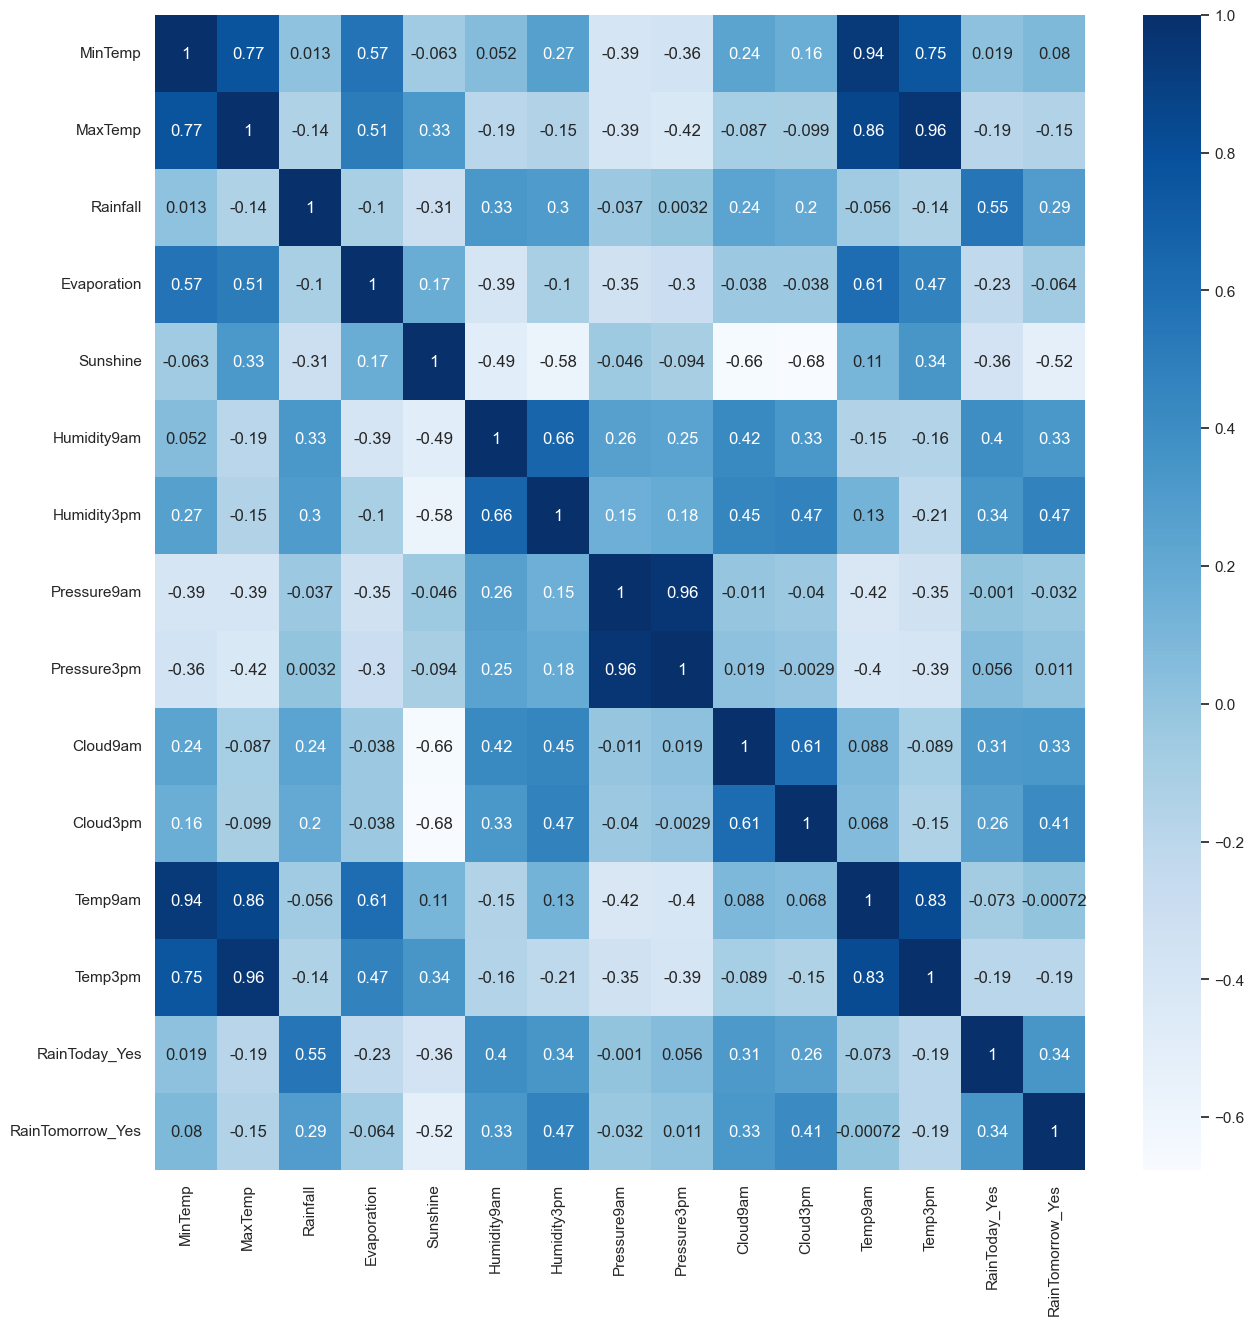

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, cmap='Blues', annot=True)

**Observation** :

MinTemp and Temp9am: Both are independent variables and highly correlated.So we drop Temp9am to avoid multicollinearity since MinTemp has a higher correlation with the dependent variable.

MaxTemp and Temp9am: Similar situation with high correlation. So we drop Temp9am due to its lower correlation with the dependent variable compared to MaxTemp.

MaxTemp and Temp3pm: Another case of high correlation. So we drop MaxTemp because it has a lower correlation with the dependent variable compared to MinTemp.

Pressure9am and Pressure3pm:High correlation. So we drop Pressure3pm due to its lower correlation with the dependent variable compared to Pressure9am.

Temp3pm and Temp9am: Again, high correlation. So we drop Temp9am due to its lower correlation with the dependent variable compared to MinTemp. Pressure9am, Pressure3pm, and Temp9am:

Analyzed the correlation matrix and found that these variables are not significantly correlated. Chose to drop Pressure9am.

In [14]:
del df['Temp9am']
del df['MaxTemp']
del df['Pressure3pm']
del df['Pressure9am']
del df['Location']

In [15]:
df.head()

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,19.5,15.6,6.200000,0.0,92.0,84.0,8.0,8.0,20.9,1,1
1,2008-02-02,19.5,6.0,3.400000,2.7,83.0,73.0,7.0,7.0,24.8,1,1
2,2008-02-03,21.6,6.6,2.400000,0.1,88.0,86.0,7.0,8.0,23.0,1,1
3,2008-02-04,20.2,18.8,2.200000,0.0,83.0,90.0,8.0,8.0,20.9,1,1
4,2008-02-05,19.7,77.4,5.187432,0.0,88.0,74.0,8.0,8.0,25.5,1,1


### Outlier Treatment

In [16]:
df.describe()

,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,3.330231,5.187432,7.179374,68.229010,54.699158,4.181523,4.218660,21.533333,0.261313,0.259215
std,4.551593,9.886270,2.756095,3.801737,15.053668,16.261752,2.505491,2.409531,4.301156,0.439416,0.438269
min,4.300000,0.000000,0.000000,0.000000,19.000000,10.000000,0.000000,0.000000,10.200000,0.000000,0.000000
25%,11.000000,0.000000,3.200000,4.300000,58.000000,44.000000,2.000000,2.000000,18.400000,0.000000,0.000000
50%,14.900000,0.000000,4.800000,8.200000,69.000000,56.000000,4.181523,4.218660,21.300000,0.000000,0.000000
75%,18.700000,1.400000,7.000000,10.200000,80.000000,64.000000,7.000000,7.000000,24.500000,1.000000,1.000000
max,27.600000,119.400000,18.400000,13.600000,100.000000,99.000000,9.000000,8.000000,44.700000,1.000000,1.000000


Text(0.5, 1.0, 'Rainfall')

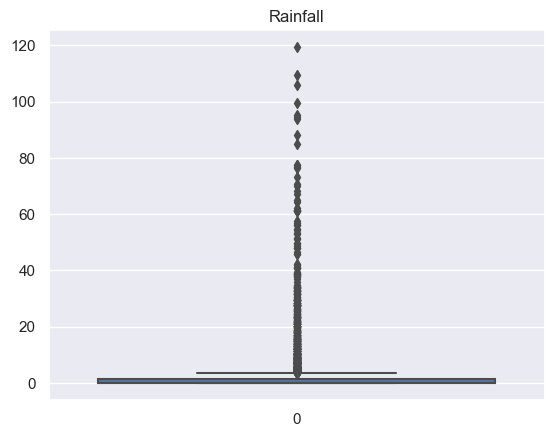

In [17]:
# Creating box plot to check for outlier in continous feature
sns.boxplot(df['Rainfall'])
plt.title('Rainfall')

Text(0.5, 1.0, 'Evaporation')

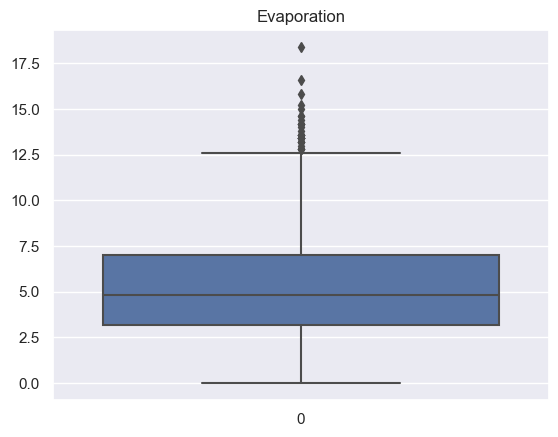

In [18]:
sns.boxplot(df['Evaporation'])
plt.title('Evaporation')

Text(0.5, 1.0, 'Humidity9am')

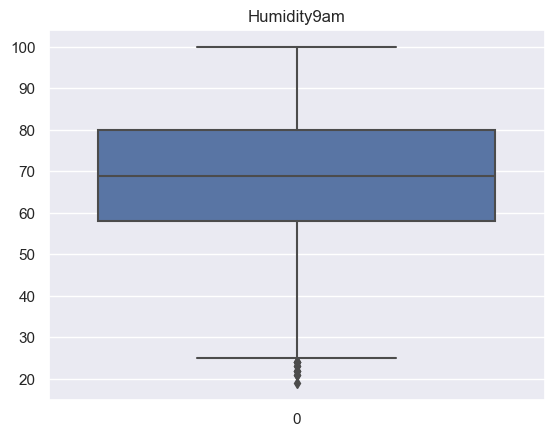

In [19]:
sns.boxplot(df['Humidity9am'])
plt.title('Humidity9am')

Text(0.5, 1.0, 'Humidity3pm')

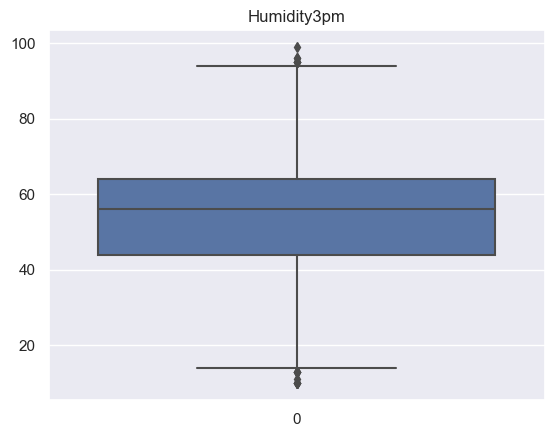

In [20]:
sns.boxplot(df['Humidity3pm'])
plt.title('Humidity3pm')

Text(0.5, 1.0, 'Temp3pm')

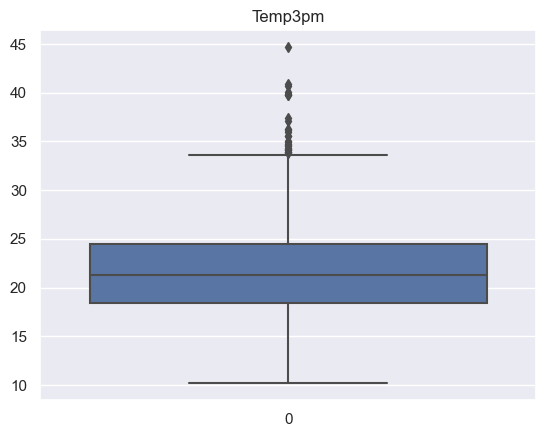

In [21]:
sns.boxplot(df['Temp3pm'])
plt.title('Temp3pm')

**Observation**:

Out of 12 features there are 5 features containing outliers which are 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm', 'Temp3pm'.

### Treating Rainfall Feature

In [22]:
# Observing 99th percentile value of rainfall feature
np.percentile(df.Rainfall,[99])

array([52.296])

In [23]:
# Fetching value of first element in this array and storing in new variable
uv = np.percentile(df.Rainfall,[99])[0]

In [24]:
# Identifing that rows that contain more then value of 99th percentile

df[(df.Rainfall > uv)]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
4,2008-02-05,19.7,77.4,5.187432,0.000000,88.0,74.0,8.000000,8.00000,25.5,1,1
218,2008-09-06,11.8,62.2,5.187432,0.000000,92.0,88.0,8.000000,8.00000,12.3,1,1
633,2009-10-26,14.4,73.2,5.187432,0.000000,91.0,60.0,8.000000,8.00000,16.6,1,1
737,2010-02-07,20.2,77.4,7.400000,0.200000,95.0,86.0,7.000000,8.00000,23.8,1,1
743,2010-02-13,21.4,70.0,9.400000,0.300000,92.0,80.0,8.000000,8.00000,25.2,1,1
855,2010-06-05,12.5,61.4,1.000000,4.400000,80.0,67.0,5.000000,7.00000,17.4,1,0
1140,2011-03-20,18.8,99.4,5.187432,3.300000,92.0,81.0,4.181523,4.21866,22.2,1,1
1182,2011-05-31,13.9,65.2,5.187432,0.700000,81.0,62.0,4.181523,4.21866,19.6,1,1
1232,2011-07-20,8.7,76.8,5.187432,1.600000,91.0,83.0,4.181523,4.21866,15.0,1,1
1234,2011-07-22,11.3,88.2,5.187432,0.000000,88.0,95.0,4.181523,4.21866,11.5,1,1


In [25]:
# Limit these values using capping and flooring
df.Rainfall[(df.Rainfall > 1.07*uv)] = 1.07*uv

C:\Users\arjun\AppData\Local\Temp\ipykernel_10108\2246830206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall > 1.07*uv)] = 1.07*uv


### Treating Evaporation Feature

In [26]:
# Observing 99th percentile value of rainfall feature
np.percentile(df.Evaporation,[99])

array([12.8])

In [27]:
# Fetching first value of array and storing them in new variable
uv = np.percentile(df.Evaporation, [99])[0]

In [28]:
# Identifing that rows that contain more then value of 99th percentile
df[(df.Evaporation > uv)]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
349,2009-01-15,23.0,0.0,14.2,9.400000,61.0,39.0,4.181523,6.00000,33.1,0,1
357,2009-01-23,25.0,0.0,14.2,11.900000,59.0,58.0,1.000000,2.00000,29.1,0,0
359,2009-01-25,20.5,0.0,13.6,6.800000,57.0,51.0,7.000000,5.00000,24.7,0,0
373,2009-02-08,21.4,0.0,14.2,12.200000,69.0,53.0,0.000000,1.00000,28.1,0,0
642,2009-11-04,19.4,0.0,13.2,0.000000,71.0,76.0,8.000000,8.00000,19.1,0,0
661,2009-11-23,19.9,0.0,13.4,0.300000,62.0,68.0,7.000000,8.00000,20.4,0,0
686,2009-12-18,20.2,5.4,13.6,0.000000,87.0,83.0,8.000000,8.00000,18.5,1,1
722,2010-01-23,25.0,0.0,13.4,5.600000,28.0,17.0,5.000000,5.00000,39.9,0,1
1098,2011-02-06,27.6,0.0,16.6,2.600000,56.0,77.0,4.181523,4.21866,22.8,0,0
1400,2012-01-04,20.7,0.0,13.4,8.400000,69.0,59.0,4.181523,4.21866,27.8,0,0


In [29]:
# Limit these values using capping and flooring
df.Evaporation[(df.Evaporation > 1.05*uv)] = 1.05*uv

C:\Users\arjun\AppData\Local\Temp\ipykernel_10108\1056072695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Evaporation[(df.Evaporation > 1.05*uv)] = 1.05*uv


### Treating Humidity9am feature

In [30]:
# Observing 1th percentile of Humidity9am feature
np.percentile(df.Humidity9am,[1])[0]

30.0

In [31]:
# Storing this value in new variable
lv = np.percentile(df.Humidity9am,[1])[0]

In [32]:
df[(df.Humidity9am < lv)]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
304,2008-12-01,17.6,0.0,7.60,10.9,29.0,21.0,3.000000,7.00000,30.8,0,0
571,2009-08-25,15.6,1.6,5.00,10.5,29.0,26.0,1.000000,1.00000,19.5,1,0
590,2009-09-13,17.3,0.0,8.20,10.9,24.0,17.0,0.000000,0.00000,31.9,0,0
603,2009-09-26,17.1,0.0,11.20,9.0,24.0,19.0,1.000000,3.00000,18.4,0,0
608,2009-10-01,14.9,0.0,7.00,10.8,21.0,10.0,3.000000,1.00000,32.8,0,0
667,2009-11-29,19.5,0.0,10.60,12.4,28.0,20.0,0.000000,5.00000,29.3,0,0
722,2010-01-23,25.0,0.0,13.40,5.6,28.0,17.0,5.000000,5.00000,39.9,0,1
1292,2011-09-18,15.7,0.0,6.80,10.5,27.0,59.0,4.181523,4.21866,21.9,0,0
1645,2012-09-05,11.1,0.0,5.20,10.6,28.0,13.0,1.000000,0.00000,27.5,0,0
1646,2012-09-06,18.4,0.0,13.40,10.7,28.0,10.0,0.000000,0.00000,27.6,0,0


In [33]:
# Limit these values using capping and flooring
df.Humidity9am[(df.Humidity9am < 0.9*lv)] = 0.9*lv

C:\Users\arjun\AppData\Local\Temp\ipykernel_10108\1991690697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Humidity9am[(df.Humidity9am < 0.9*lv)] = 0.9*lv


In [34]:
# Observing 99th percentile of Humidity9am feature
np.percentile(df.Humidity9am, [99])[0]

96.0

In [35]:
uv = np.percentile(df.Humidity9am, [99])[0]

In [36]:
df[(df.Humidity9am > uv)]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
122,2008-06-02,14.3,22.00000,1.800000,0.1,97.0,90.0,8.000000,7.00000,17.1,1,1
123,2008-06-03,15.2,4.00000,0.400000,0.0,98.0,90.0,8.000000,8.00000,16.7,1,1
128,2008-06-08,12.7,6.00000,1.400000,0.5,97.0,71.0,8.000000,7.00000,17.2,1,1
130,2008-06-10,12.4,1.60000,1.600000,3.9,98.0,68.0,7.000000,1.00000,19.1,1,0
132,2008-06-12,13.7,5.40000,1.800000,6.9,97.0,64.0,8.000000,1.00000,20.1,1,0
489,2009-06-04,13.1,10.40000,0.000000,0.6,97.0,86.0,7.000000,7.00000,16.8,1,0
525,2009-07-10,9.5,8.80000,1.800000,8.4,97.0,65.0,5.000000,6.00000,16.8,1,0
696,2009-12-28,20.1,16.00000,2.600000,1.4,97.0,83.0,8.000000,7.00000,22.7,1,1
909,2010-07-30,12.0,3.40000,3.800000,5.8,97.0,62.0,4.000000,7.00000,21.0,1,1
1324,2011-10-20,13.5,0.00000,8.000000,12.4,100.0,50.0,4.181523,4.21866,23.0,0,0


In [37]:
# Limit these values using capping and flooring
df.Humidity9am[(df.Humidity9am > 1.02*uv)] = 1.02*uv

C:\Users\arjun\AppData\Local\Temp\ipykernel_10108\665232656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Humidity9am[(df.Humidity9am > 1.02*uv)] = 1.02*uv


### Treating Humidity3pm feature

In [38]:
np.percentile(df.Humidity3pm, [1])[0]

18.0

In [39]:
# Store above value in new variable
lv = np.percentile(df.Humidity3pm, [1])[0]

In [40]:
df[(df.Humidity3pm < lv)]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
232,2008-09-20,18.8,0.0,7.60,10.9,46.0,17.0,0.000000,6.00000,31.6,0,0
590,2009-09-13,17.3,0.0,8.20,10.9,27.0,17.0,0.000000,0.00000,31.9,0,0
608,2009-10-01,14.9,0.0,7.00,10.8,27.0,10.0,3.000000,1.00000,32.8,0,0
717,2010-01-18,16.7,0.0,8.00,13.0,55.0,14.0,1.000000,2.00000,25.1,0,0
722,2010-01-23,25.0,0.0,13.40,5.6,28.0,17.0,5.000000,5.00000,39.9,0,1
1288,2011-09-14,11.1,0.0,5.20,10.9,37.0,14.0,4.181523,4.21866,26.0,0,0
1297,2011-09-23,12.7,0.0,5.60,9.5,44.0,14.0,4.181523,4.21866,30.4,0,0
1645,2012-09-05,11.1,0.0,5.20,10.6,28.0,13.0,1.000000,0.00000,27.5,0,0
1646,2012-09-06,18.4,0.0,13.40,10.7,28.0,10.0,0.000000,0.00000,27.6,0,0
1674,2012-10-04,14.5,0.0,7.20,11.4,39.0,16.0,0.000000,0.00000,31.9,0,0


In [41]:
# Limit these values using capping and flooring
df.Humidity3pm[(df.Humidity3pm < 0.9*lv)] = 0.9*lv

C:\Users\arjun\AppData\Local\Temp\ipykernel_10108\2484920187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Humidity3pm[(df.Humidity3pm < 0.9*lv)] = 0.9*lv


### Treating Temp3pm feature

In [42]:
np.percentile(df.Temp3pm,[99])[0]

32.76399999999999

In [43]:
# storing value in variable
uv = np.percentile(df.Temp3pm,[99])[0]

In [44]:
df[(df.Temp3pm > uv)]

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
245,2008-10-03,22.5,0.0,8.60,9.8,41.00000,20.0,1.000000,7.00000,33.9,0,1
273,2008-10-31,16.9,0.2,3.20,5.0,53.00000,24.0,6.000000,7.00000,34.6,0,0
335,2009-01-01,18.4,0.0,9.80,12.9,73.00000,22.0,4.000000,6.00000,34.3,0,0
349,2009-01-15,23.0,0.0,13.44,9.4,61.00000,39.0,4.181523,6.00000,33.1,0,1
358,2009-01-24,24.8,0.0,10.60,11.1,55.00000,20.0,6.000000,2.00000,40.1,0,0
608,2009-10-01,14.9,0.0,7.00,10.8,27.00000,16.2,3.000000,1.00000,32.8,0,0
641,2009-11-03,18.9,0.0,6.20,11.0,73.00000,18.0,6.000000,6.00000,36.3,0,0
660,2009-11-22,21.2,0.0,7.40,6.0,75.00000,19.0,6.000000,7.00000,39.8,0,0
722,2010-01-23,25.0,0.0,13.40,5.6,28.00000,17.0,5.000000,5.00000,39.9,0,1
742,2010-02-12,23.9,0.0,9.00,9.8,71.00000,32.0,6.000000,7.00000,37.4,0,1


In [45]:
# Limit these values by capping and flooring

df.Temp3pm[(df.Temp3pm > 1.1*uv)] = 1.1*uv

C:\Users\arjun\AppData\Local\Temp\ipykernel_10108\874748433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Temp3pm[(df.Temp3pm > 1.1*uv)] = 1.1*uv


# X Y Split

In [46]:
x = df.drop(columns=['Date','RainTomorrow_Yes'])
x.head()

,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes
0,19.5,15.60000,6.200000,0.0,92.0,84.0,8.0,8.0,20.9,1
1,19.5,6.00000,3.400000,2.7,83.0,73.0,7.0,7.0,24.8,1
2,21.6,6.60000,2.400000,0.1,88.0,86.0,7.0,8.0,23.0,1
3,20.2,18.80000,2.200000,0.0,83.0,90.0,8.0,8.0,20.9,1
4,19.7,55.95672,5.187432,0.0,88.0,74.0,8.0,8.0,25.5,1


In [47]:
y = df['RainTomorrow_Yes']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: uint8

# Standardizing the data

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
# Creating scaler object
scaler = StandardScaler().fit(x)

In [50]:
x_scaled = scaler.transform(x)

# Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [53]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_scaled,y, test_size=0.2, random_state=1)

In [54]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2669, 10) (668, 10) (2669,) (668,)


In [55]:
print(x_train_s.shape, x_test_s.shape, y_train_s.shape, y_test_s.shape)

(2669, 10) (668, 10) (2669,) (668,)


# Model Selection:

**Logistic Regression**:
Strengths: Simple and easy to understand, suitable for binary classification tasks.
Use Cases: Ideal as a starting point, especially when predicting outcomes with two possibilities.

**Linear Discriminant Analysis (LDA)**:

Strengths: Effective for classification tasks, especially when dealing with multiple classes.
Use Cases: Well-suited when there are more than two classes to predict.

**K-Nearest Neighbors (KNN)**:

Strengths: Intuitive and easy to implement, particularly for smaller datasets.
Use Cases: Handy for classifying a data point based on the majority class of its neighbors.

**Decision Trees**:

Strengths: Great for capturing complex relationships in the data.
Use Cases: Useful when a clear, visual representation of decision-making processes is desired.

**Random Forest**:

Strengths: Builds on Decision Trees, providing improved accuracy and robustness.
Use Cases: Effective for handling larger datasets and complex relationships.

**Gradient Boosting**:

Strengths: Powerful for boosting model performance by combining weak learners.
Use Cases: Particularly effective for large-scale datasets, offering high accuracy.

**XG Boost**:

Strengths: An optimized form of Gradient Boosting, known for speed and performance.
Use Cases: Often preferred in competitions and tasks like image classification due to its efficiency.


In summary, choose Logistic Regression for simplicity and binary tasks, Decision Trees/Random Forests for capturing complexity, and Gradient Boosting/XGBoost for high accuracy, especially in large datasets or competitive scenarios. The selection depends on the specific characteristics and goals of your classification problem.

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
clf_lr = LogisticRegression()

In [58]:
clf_lr.fit(x_train,y_train)

C:\Users\arjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
print(clf_lr.intercept_, clf_lr.coef_)

[-0.30432814] [[ 0.00561011  0.02545954  0.03185874 -0.25485107 -0.01697778  0.04075023
  -0.13048356  0.11626215 -0.03862076  0.83157954]]


In [60]:
y_pred_lr = clf_lr.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [62]:
confusion_matrix(y_test, y_pred_lr)

array([[459,  47],
       [ 66,  96]], dtype=int64)

In [63]:
from sklearn import metrics

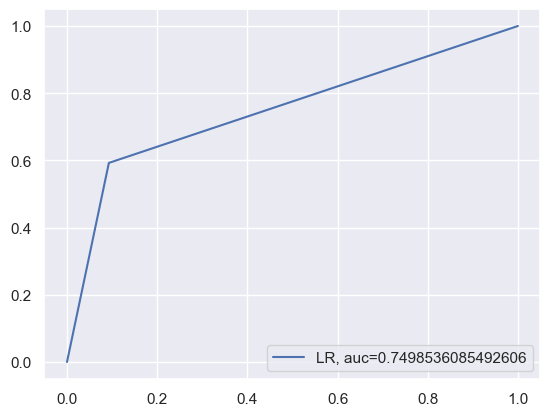

In [64]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_lr)
auc = metrics.roc_auc_score(y_test, y_pred_lr) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [65]:
print('Precision score: ',precision_score(y_test, y_pred_lr))
print('Recall score: ',recall_score(y_test, y_pred_lr))
print('Accuracy score: ',accuracy_score(y_test, y_pred_lr))

Precision score:  0.6713286713286714
Recall score:  0.5925925925925926
Accuracy score:  0.8308383233532934


**Model Interpretation** :
The performance metrics for our logistic regression model in simpler terms:

Accuracy Score (0.8293): This score, around 82.93%, means our model gets it right for about 82.93% of the cases in our dataset. It's like an overall grade for the model.

Precision Score (0.6764): With a precision score of 67.64%, when the model predicts something positive, it's correct about 67.74% of the time. It tells us how accurate the model is when it makes positive predictions.

Recall Score (0.5679): The recall score of 56.79% means the model catches about 56.79% of all the actual positive cases. It shows how well the model finds positive instances.

ROC AUC Score (0.7404): The ROC AUC score of 0.7404 measures how well the model can tell the difference between positive and negative cases. A value of 0.7404 indicates the model does reasonably well in this task.

In simpler terms, the model is about 82.93% correct overall, when it says something positive, it's right about 67.64% of the time, it catches around 56.79% of actual positive cases, and it's decent at distinguishing between positive and negative cases.

# Linear Discriminant Analysis (LDA)

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [67]:
cls_lda = LinearDiscriminantAnalysis()

In [68]:
cls_lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [69]:
y_pred_lda = cls_lda.predict(x_test)

In [70]:
confusion_matrix(y_test, y_pred_lda)

array([[457,  49],
       [ 65,  97]], dtype=int64)

In [71]:
print('Precision score: ',precision_score(y_test,y_pred_lda))
print('Recall score: ',recall_score(y_test, y_pred_lda))
print('Accuracy score: ',accuracy_score(y_test, y_pred_lda))

Precision score:  0.6643835616438356
Recall score:  0.5987654320987654
Accuracy score:  0.8293413173652695


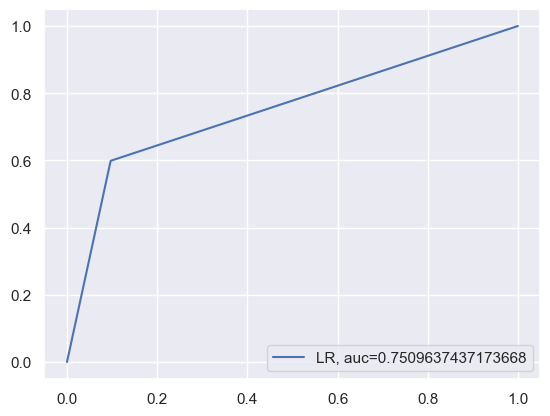

In [72]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_lda)
auc = metrics.roc_auc_score(y_test, y_pred_lda) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Model Interpretation** :
The performance metrics for our LDA model:

Accuracy Score (0.8293): This score, about 82.93%, means our LDA model gets it right for approximately 82.93% of the cases in our dataset. It's like an overall grade for the model.

Precision Score (0.6643): With a precision score of 66.43%, when the LDA model predicts something positive, it's correct about 66.43% of the time. It tells us how accurate the model is when it makes positive predictions.

Recall Score (0.5987): The recall score of 59.87% means the LDA model catches about 59.87% of all the actual positive cases. It shows how well the model finds positive instances, which is crucial when missing positive cases is a concern.

ROC AUC Score (0.7509): The ROC AUC score of 0.7509 measures how well the LDA model can distinguish between positive and negative cases. A score of 0.7463 suggests the model performs reasonably well in this task.

In simpler terms, the model is about 82.93% correct overall, when it predicts something positive, it's right about 66.43% of the time, it catches around 59.87% of actual positive cases, and it's good at distinguishing between positive and negative cases.

# K-Nearest Neighbor (KNN)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
cls_knn = KNeighborsClassifier(n_neighbors=5)

In [75]:
cls_knn.fit(x_train_s,y_train_s)

KNeighborsClassifier()

In [76]:
y_pred_knn = cls_knn.predict(x_test_s)

In [77]:
confusion_matrix(y_test_s, y_pred_knn)

array([[456,  50],
       [ 76,  86]], dtype=int64)

In [78]:
print('Precision score: ',precision_score(y_test_s, y_pred_knn))
print('Recall score: ',recall_score(y_test_s, y_pred_knn))
print('Accuracy score: ',accuracy_score(y_test_s, y_pred_knn))

Precision score:  0.6323529411764706
Recall score:  0.5308641975308642
Accuracy score:  0.811377245508982


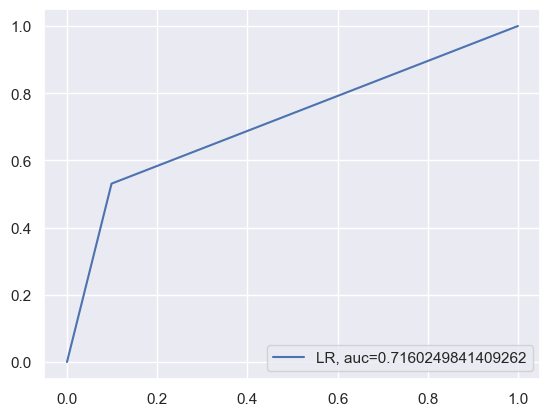

In [79]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_knn)
auc = metrics.roc_auc_score(y_test, y_pred_knn) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN using Grid Search

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# Create KNN Regressor object
cls_knn1 = KNeighborsClassifier()

In [82]:
param = {'n_neighbors': range(1,10,1)}

In [83]:
grid_search = GridSearchCV(cls_knn1, param,n_jobs=-1)

In [84]:
grid_search.fit(x_train_s, y_train_s)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10)})

In [85]:
grid_search.best_params_

{'n_neighbors': 8}

In [86]:
knn_best = grid_search.best_estimator_

In [87]:
y_pred_knn_best = knn_best.predict(x_test_s)

In [88]:
confusion_matrix(y_test, y_pred_knn_best)

array([[476,  30],
       [ 80,  82]], dtype=int64)

In [89]:
print('Precision score: ',precision_score(y_test_s, y_pred_knn_best))
print('Recall score: ',recall_score(y_test_s, y_pred_knn_best))
print('Accuracy score: ',accuracy_score(y_test_s, y_pred_knn_best))

Precision score:  0.7321428571428571
Recall score:  0.5061728395061729
Accuracy score:  0.8353293413173652


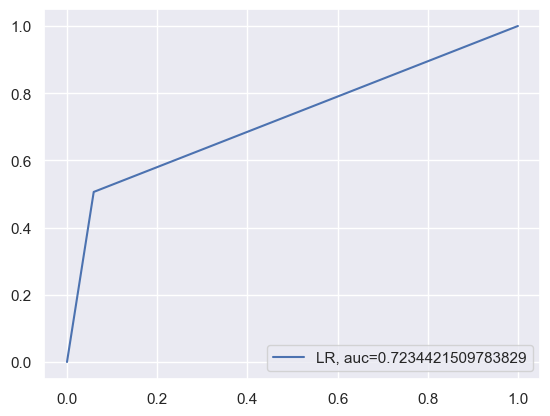

In [90]:
fpr, tpr, _ = metrics.roc_curve(y_test_s,  y_pred_knn_best)
auc = metrics.roc_auc_score(y_test_s, y_pred_knn_best) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Model Interpretation**:

After employing grid search to identify the optimal number of neighbors for the KNN model within a range of 1 to 10, noticeable changes in performance metrics have been observed:

**Accuracy and Precision Enhancement:**

Explanation: The model's accuracy and precision exhibit improvement, indicating enhanced overall correctness and accuracy, particularly in predicting positive cases.

Significance: The model is becoming more reliable in its positive predictions and is minimizing errors, leading to heightened accuracy and precision.

**Decline in Recall:**

Explanation: Unfortunately, there is a decrease in recall as the number of neighbors increases. Recall, which gauges the model's ability to capture actual positive cases, experiences a reduction.

Significance: While the model becomes more precise and accurate overall, there is a trade-off with a diminishing capacity to identify all positive instances.

**Choosing the Optimal Number of Neighbors:**

Scenario 1 (Emphasis on High Recall - n_neighbors=1): If the primary objective is to capture as many positive cases as possible, even at the expense of potential false positives, opting for the KNN model with a minimal number of neighbors (e.g., n_neighbors=1) may be preferable. This prioritizes sensitivity and minimizing the chance of missing positive instances.

Scenario 2 (Prioritizing Overall Correctness and Precision - n_neighbors=10): If the goal is to achieve a high level of overall correctness and precision, and there is acceptance for missing some positive cases, selecting the Grid Search KNN model with a larger number of neighbors (e.g., n_neighbors=10) could be the more suitable choice. This emphasizes specificity and reducing false positives, even if it means potentially missing some positive instances.

In our KNN model we use n_neighbors=5 to make our model neutral and after grid search we find that best value of n_neighbors under 10 is 8.

In summary, the optimal model choice is contingent on the specific use case, emphasizing the desired balance between precision, recall, and overall accuracy in the classification task.

# Decision Tree Classifier

In [91]:
from sklearn import tree

In [92]:
cls_dtc = tree.DecisionTreeClassifier(max_depth=3, random_state=1)

In [93]:
cls_dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [94]:
y_pred_tree = cls_dtc.predict(x_test)

In [95]:
confusion_matrix(y_test, y_pred_tree)

array([[451,  55],
       [ 66,  96]], dtype=int64)

In [96]:
print('Precision score: ',precision_score(y_test, y_pred_tree))
print('Recall score: ',recall_score(y_test, y_pred_tree))
print('Accuracy score: ',accuracy_score(y_test, y_pred_tree))

Precision score:  0.6357615894039735
Recall score:  0.5925925925925926
Accuracy score:  0.8188622754491018


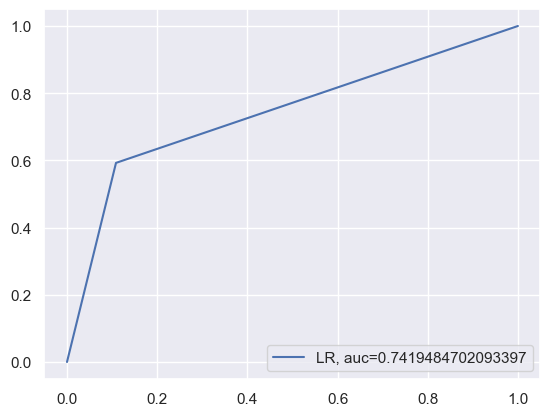

In [97]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_tree)
auc = metrics.roc_auc_score(y_test, y_pred_tree) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Plotting tree graph

In [98]:
dot_data = tree.export_graphviz(cls_dtc, out_file=None, filled=True)

In [99]:
from IPython.display import Image

In [100]:
import pydotplus

In [101]:
graph = pydotplus.graph_from_dot_data(dot_data)

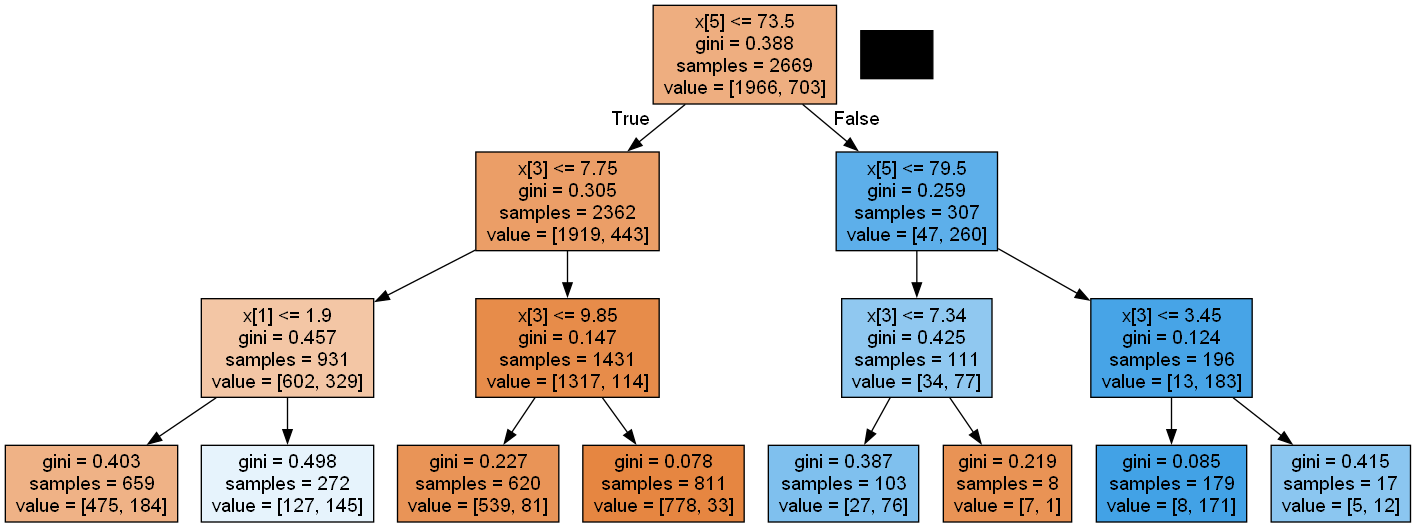

In [102]:
Image(graph.create_png())

**Model Interpretation :**

Accuracy Score (0.8188): This score, around 81.88%, means that the model gets it right for about 81.88% of our data. It's like an overall grade for the model.

Precision Score (0.6357): With a precision score of 63.57%, when the model says something positive, it's right about 63.57% of the time. It tells us how good the model is at being accurate when it makes positive predictions.

Recall Score (0.5925): The recall score of 59.25% means that the model catches about 59.25% of all the actual positive cases. It shows how well the model finds positive instances.

ROC AUC Score (0.7419): The ROC AUC score of 0.7419 measures how well the model can tell the difference between positive and negative cases. A score of 0.7419 suggests the model does reasonably well in this task.

In simpler terms, the model is about 81.88% correct overall, when it says something positive, it's right about 63.57% of the time, it catches around 59.25% of actual positive cases, and it's decent at distinguishing between positive and negative cases.

# Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
cls_rf = RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=1)

In [105]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=1)

In [106]:
y_pred_rf = cls_rf.predict(x_test)

In [107]:
confusion_matrix(y_test, y_pred_rf)

array([[482,  24],
       [ 78,  84]], dtype=int64)

In [108]:
print('Precision score: ',precision_score(y_test, y_pred_rf))
print('Recall score: ',recall_score(y_test, y_pred_rf))
print('Accuracy score: ',accuracy_score(y_test, y_pred_rf))

Precision score:  0.7777777777777778
Recall score:  0.5185185185185185
Accuracy score:  0.8473053892215568


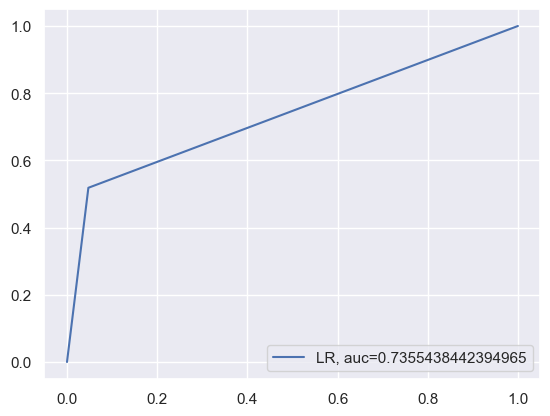

In [109]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rf)
auc = metrics.roc_auc_score(y_test, y_pred_rf) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest (Grid Search)

In [110]:
cls_rf2 = RandomForestClassifier()

In [111]:
params= {'n_estimators': [100,200,500],
         'max_depth' : [None, 3, 6],
         'min_samples_split' : [4,6,8,10],
         'min_samples_leaf' : [5,7,9,11,13]}

In [112]:
grid_search_rf = GridSearchCV(cls_rf2, params, cv=5, n_jobs=-1)

In [113]:
grid_search_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 6],
                         'min_samples_leaf': [5, 7, 9, 11, 13],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 500]})

In [114]:
grid_search_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

In [115]:
cls_rf_best = grid_search_rf.best_estimator_

In [116]:
y_pred_rf_best = cls_rf_best.predict(x_test)

In [117]:
confusion_matrix(y_test,y_pred_rf_best)

array([[472,  34],
       [ 74,  88]], dtype=int64)

In [118]:
print('Precision score: ',precision_score(y_test, y_pred_rf_best))
print('Recall score: ',recall_score(y_test, y_pred_rf_best))
print('Accuracy score: ',accuracy_score(y_test, y_pred_rf_best))

Precision score:  0.7213114754098361
Recall score:  0.5432098765432098
Accuracy score:  0.8383233532934131


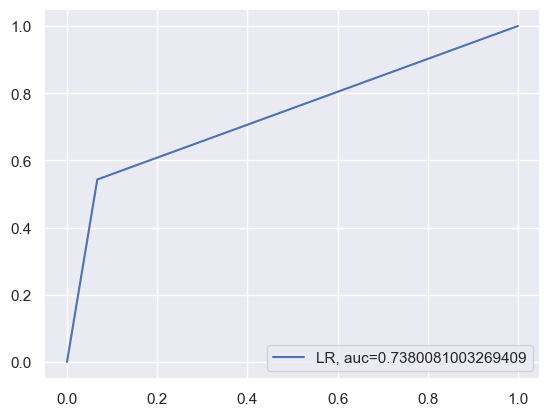

In [119]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rf_best)
auc = metrics.roc_auc_score(y_test, y_pred_rf_best) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Model Interpretation** :

**Random Forest Model (Without Grid Search):**

Accuracy: 84.73%,

Precision: 77.78%,

Recall: 51.85%,

ROC AUC Score: 0.7354

**Random Forest Model (With Grid Search):**

Accuracy: 84.13%,

Precision: 72.23%,

Recall: 56.17%,

ROC AUC Score: 0.7462

The Random Forest model without grid search has a bit higher accuracy and precision, but a lower recall and ROC AUC score compared to the Random Forest model with grid search.

To decide which model is better for our task, we need to consider our specific goals and the trade-offs between different performance metrics:

If we care more about overall accuracy and precision and are okay with a lower recall, then the Random Forest model without grid search might be the better choice.

If having a higher recall and ROC AUC score is crucial, and we can tolerate a small drop in accuracy and precision, then the Random Forest model with grid search might be the preferred option.

# Gradient Boosting Classifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
cls_gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate= 0.02, max_depth=2)

In [122]:
cls_gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=2, n_estimators=1000)

In [123]:
y_pred_gbc = cls_gbc.predict(x_test)

In [124]:
confusion_matrix(y_test, y_pred_gbc)

array([[467,  39],
       [ 69,  93]], dtype=int64)

In [125]:
print('Precision score: ',precision_score(y_test, y_pred_gbc))
print('Recall score: ',recall_score(y_test, y_pred_gbc))
print('Accuracy score: ',accuracy_score(y_test, y_pred_gbc))

Precision score:  0.7045454545454546
Recall score:  0.5740740740740741
Accuracy score:  0.8383233532934131


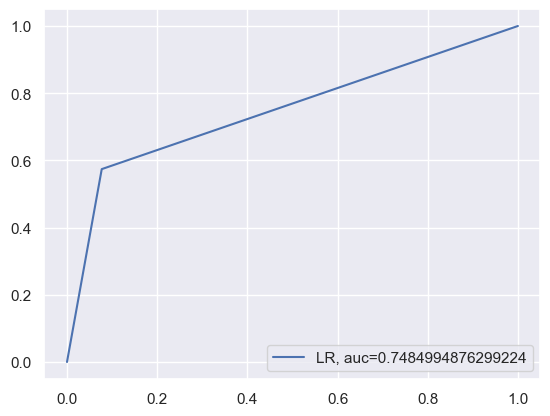

In [126]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_gbc)
auc = metrics.roc_auc_score(y_test, y_pred_gbc) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# ADA Boost Classifier

In [127]:
from sklearn.ensemble import AdaBoostClassifier

In [128]:
cls_ada = AdaBoostClassifier(learning_rate= 0.01, n_estimators= 1000, random_state=1)

In [129]:
cls_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000, random_state=1)

In [130]:
y_pred_ada = cls_ada.predict(x_test)

In [131]:
confusion_matrix(y_test, y_pred_ada)

array([[475,  31],
       [ 74,  88]], dtype=int64)

In [132]:
print('Precision score: ',precision_score(y_test, y_pred_ada))
print('Recall score: ',recall_score(y_test, y_pred_ada))
print('Accuracy score: ',accuracy_score(y_test, y_pred_ada))

Precision score:  0.7394957983193278
Recall score:  0.5432098765432098
Accuracy score:  0.842814371257485


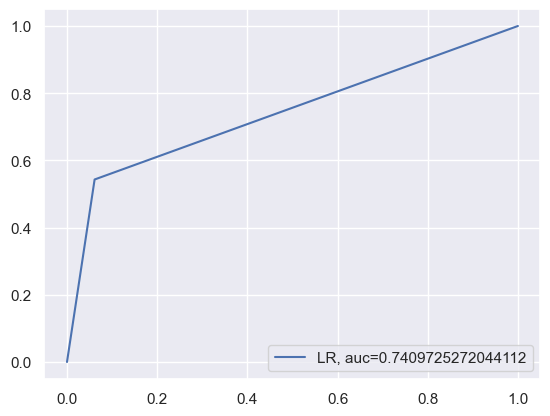

In [133]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_ada)
auc = metrics.roc_auc_score(y_test, y_pred_ada) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Ada Boost with estimator Random Forest

In [134]:
clf_ada2 = AdaBoostClassifier(cls_rf, learning_rate = 0.02, n_estimators=1000, random_state=1)

In [135]:
clf_ada2.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=3, n_jobs=-1,
                                                    random_state=1),
                   learning_rate=0.02, n_estimators=1000, random_state=1)

In [136]:
y_pred_ada_erf = clf_ada2.predict(x_test)

In [137]:
confusion_matrix(y_test, y_pred_ada_erf)

array([[467,  39],
       [ 71,  91]], dtype=int64)

In [138]:
print('Precision score: ',precision_score(y_test, y_pred_ada_erf))
print('Recall score: ',recall_score(y_test, y_pred_ada_erf))
print('Accuracy score: ',accuracy_score(y_test, y_pred_ada_erf))

Precision score:  0.7
Recall score:  0.5617283950617284
Accuracy score:  0.8353293413173652


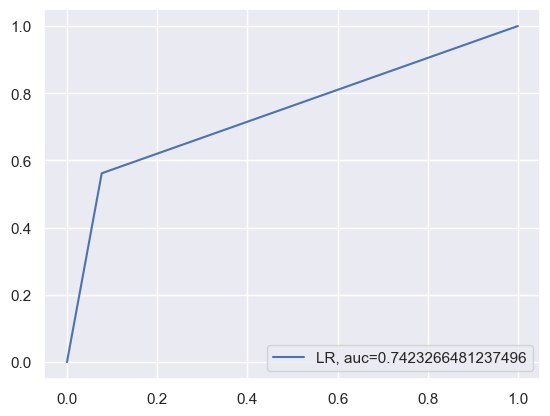

In [139]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_ada_erf)
auc = metrics.roc_auc_score(y_test, y_pred_ada_erf) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Model Interpretation** :

Using AdaBoost with Random Forest as the "estimator" gives us better results in terms of accuracy, precision, recall, and AUC of ROC compared to the regular AdaBoost. This indicates that AdaBoost with Random Forest is a better choice for our classification task. Still, it's important to pick the best model based on your specific classification goals and needs. Also, take a moment to think about the impact of false positives and false negatives in your application when making the decision.

# XG Boost Classifier

In [140]:
import xgboost as xgb

In [141]:
cls_xgb = xgb.XGBClassifier(learning_rate=0.01, max_depth=3,n_estimator=1000, n_jobs=-1)

In [142]:
cls_xgb.fit(x_train,y_train)

[12:24:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimator=1000, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, predictor=None, ...)

In [143]:
y_pred_xgb = cls_xgb.predict(x_test)

In [144]:
confusion_matrix(y_test, y_pred_xgb)

array([[480,  26],
       [ 79,  83]], dtype=int64)

In [145]:
print('Precision score: ',precision_score(y_test, y_pred_xgb))
print('Recall score: ',recall_score(y_test, y_pred_xgb))
print('Accuracy score: ',accuracy_score(y_test, y_pred_xgb))

Precision score:  0.7614678899082569
Recall score:  0.5123456790123457
Accuracy score:  0.842814371257485


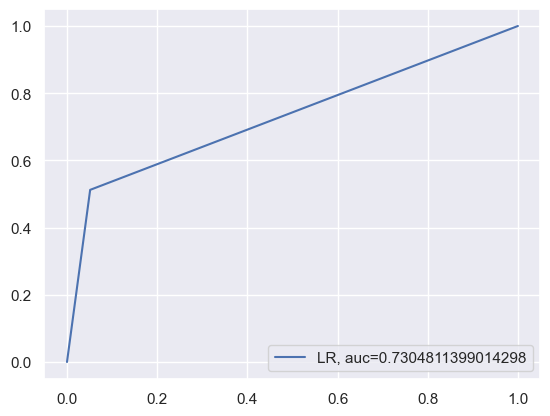

In [146]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_xgb)
auc = metrics.roc_auc_score(y_test, y_pred_xgb) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

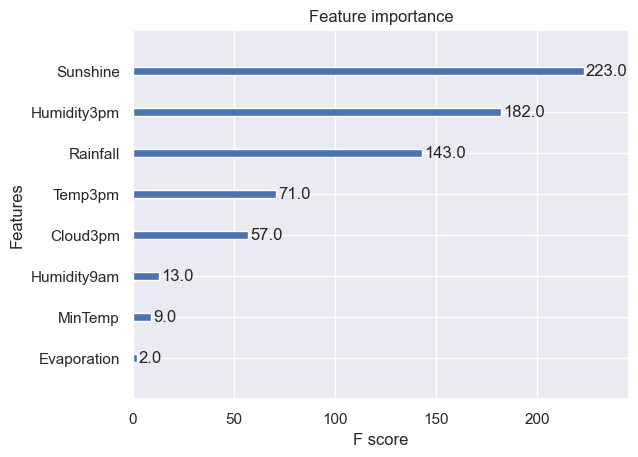

In [147]:
xgb.plot_importance(cls_xgb)

# XG Boost (Grid Search)

In [148]:
cls_xgb2 = xgb.XGBClassifier(n_estimators=5000, learning_rate=0.02, random_state=1)

In [149]:
# Creating param grid / hyperperameter for grid search

param_test = {'max_depth' : range(3,10,2),
                'gamma' : [0.1, 0.2, 0.3],
                'subsample' : [0.8, 0.9],
                'n_estimator' :[200,500,700],
                'colsample_bytree' : [0.8, 0.9],
                'reg_alpha' : [0.01, 0.1, 1]  }

In [150]:
grid_search = GridSearchCV(cls_xgb, param_test, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [151]:
grid_search.fit(x_train, y_train)

[12:27:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimator=1000, n_estimators=100,
                                     n_jobs=-1, num_parallel_tree=None,
                                     predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'n_estimator': [200, 500, 700],
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [152]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 7,
 'n_estimator': 200,
 'reg_alpha': 1,
 'subsample': 0.8}

In [153]:
cls_xgb_best = grid_search.best_estimator_

In [154]:
y_pred_xgb_best = cls_xgb_best.predict(x_test)

In [155]:
confusion_matrix(y_test, y_pred_xgb_best)

array([[472,  34],
       [ 73,  89]], dtype=int64)

In [156]:
print('Precision score: ',precision_score(y_test, y_pred_xgb_best))
print('Recall score: ',recall_score(y_test, y_pred_xgb_best))
print('Accuracy score: ',accuracy_score(y_test, y_pred_xgb_best))

Precision score:  0.7235772357723578
Recall score:  0.5493827160493827
Accuracy score:  0.8398203592814372


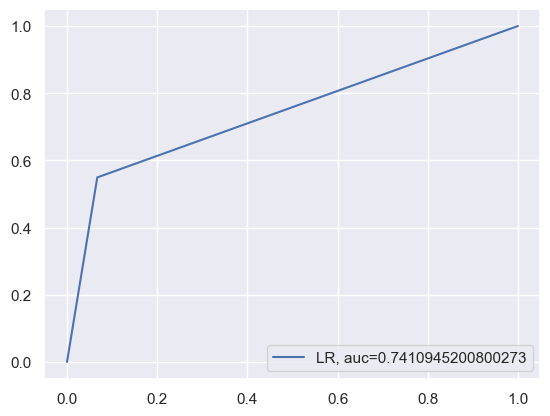

In [158]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_xgb_best)
auc = metrics.roc_auc_score(y_test, y_pred_xgb_best) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Model Interpretation :**

The XGBoost Classifier without Grid Search seems to work better overall in terms of accuracy, precision, and recall compared to the XGBoost Classifier with Grid Search. The one without Grid Search is a bit better, but it has a slightly lower AUC of ROC. Choosing between these two models depends on what you're aiming for and the balance you want between different performance measures. It's important to think about the impact of both false positives and false negatives in your specific situation when deciding which model is the best fit

# Selection of perfect model 

In [159]:
# Displaying accuracy score of all models

accuracy_scores = {"Logistic Regression": accuracy_score(y_test, y_pred_lr),
                 "LDA (Linear discriminant Analysis)": accuracy_score(y_test, y_pred_lda),
                 "KNN": accuracy_score(y_test, y_pred_knn),
                 "KNN using Grid Search" : accuracy_score(y_test, y_pred_knn_best),
                 "Decision Tree": accuracy_score(y_test, y_pred_tree),
                 "Random Forest": accuracy_score(y_test, y_pred_rf),
                 "Random forest using Grid search" : accuracy_score(y_test, y_pred_rf_best),
                 "Gradient Bossting Classifier": accuracy_score(y_test, y_pred_gbc),
                 "ADA Boosting Classifier": accuracy_score(y_test, y_pred_ada),
                 "ADA Boost using Random forest as estimator": accuracy_score(y_test, y_pred_ada_erf),
                 "XGBoost" : accuracy_score(y_test, y_pred_xgb),
                 "XGBoost using Grid search" : accuracy_score(y_test, y_pred_xgb_best)}

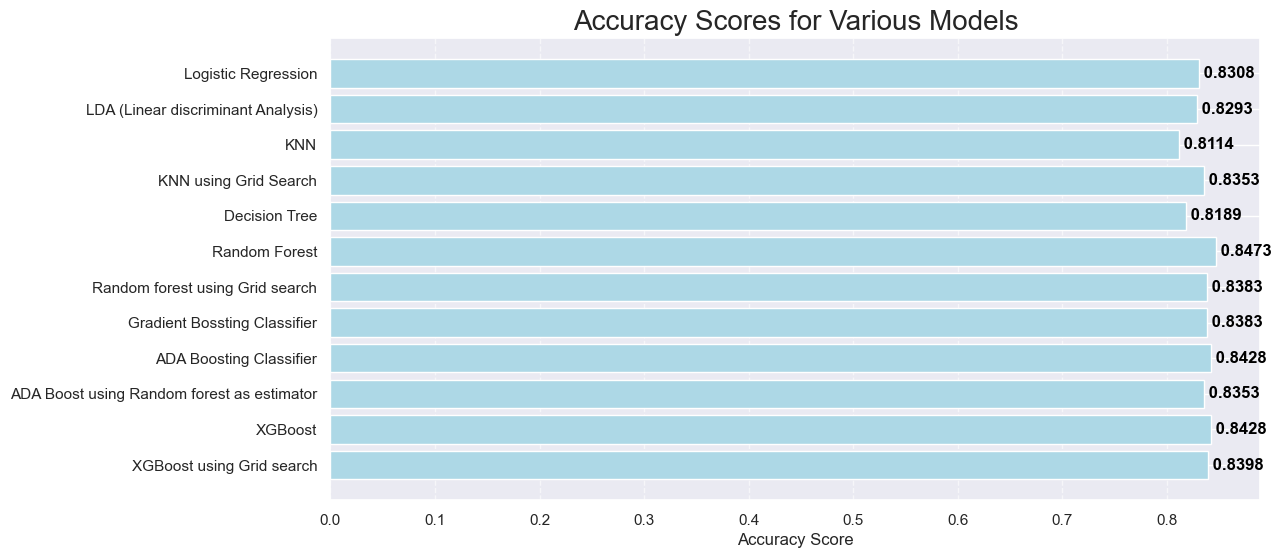

In [162]:
import matplotlib.pyplot as plt

# Extract model names and accuracy scores
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(models, scores, color='lightblue')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Scores for Various Models',fontdict = {'fontsize': 20})
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)


# Show the accuracy scores on the bars
for i, v in enumerate(scores):
    plt.text(v, i, f' {v:.4f}', color='black', va='center', fontweight='bold')

plt.show()


In [164]:
# Displaying Precision score of all models

precision_scores = {"Logistic Regression": precision_score(y_test, y_pred_lr),
                 "LDA (Linear discriminant Analysis)": precision_score(y_test, y_pred_lda),
                 "KNN": precision_score(y_test, y_pred_knn),
                 "KNN using Grid Search" : precision_score(y_test, y_pred_knn_best),
                 "Decision Tree": precision_score(y_test, y_pred_tree),
                 "Random Forest": precision_score(y_test, y_pred_rf),
                 "Random forest using Grid search" : precision_score(y_test, y_pred_rf_best),
                 "Gradient Bossting Classifier": precision_score(y_test, y_pred_gbc),
                 "ADA Boosting Classifier": precision_score(y_test, y_pred_ada),
                 "ADA Boost using Random forest as estimator": precision_score(y_test, y_pred_ada_erf),
                 "XGBoost" : precision_score(y_test, y_pred_xgb),
                 "XGBoost using Grid search" : precision_score(y_test, y_pred_xgb_best)}

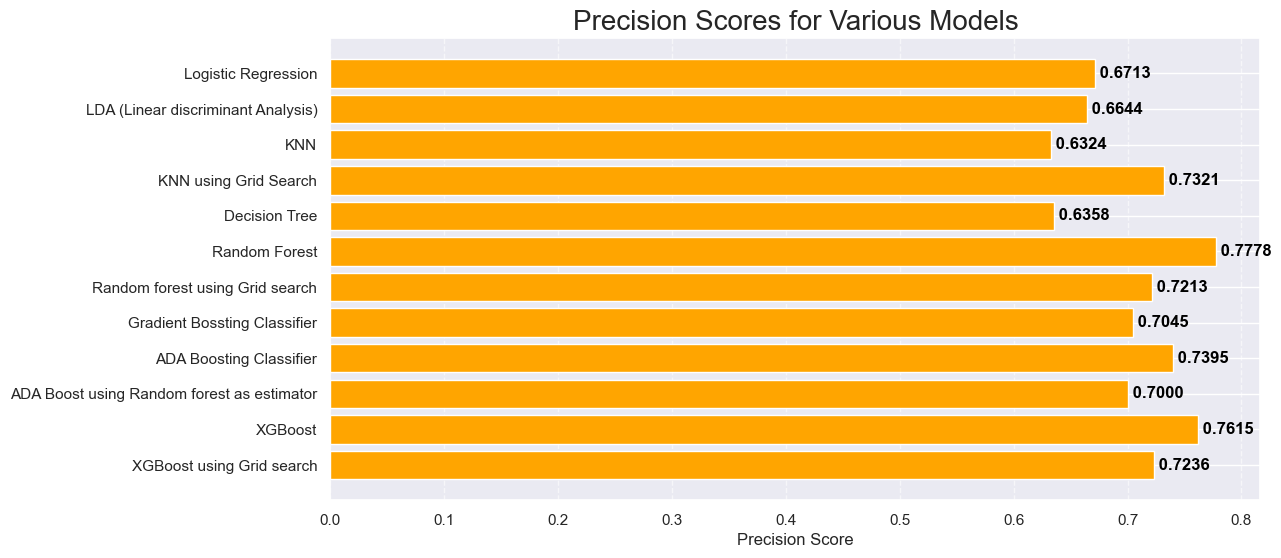

In [169]:
# Extract model names and Precision scores
models = list(precision_scores.keys())
scores = list(precision_scores.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(models, scores, color='orange')
plt.xlabel('Precision Score')
plt.title('Precision Scores for Various Models',fontdict = {'fontsize': 20})
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the Precision scores on the bars
for i, v in enumerate(scores):
    plt.text(v, i, f' {v:.4f}', color='black', va='center', fontweight='bold')

plt.show()

### Best Model:
In my analysis, I found that the best model for predicting rainfall in Sydney is "Random Forest" This model stand out because it achieved high scores in key metrics. It has best accuracy score of 84.73%, precision score of 77.78% and roc_auc_score of 0.7354. Based on these scores, the Random Forest is top performing model.